# **Bioinformatics Project - Computational Drug Discovery Exploratory Data Analysis**



---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

zsh:1: command not found: wget
chmod: Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
bash: ./Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - rdkit -> python[version='2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0|3.4.*']

Your python: python=3.9

If python is on the left-most s

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dardarin_bioactivity_preprocessed_data.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,293.326,3.40042,3.0,5.0
1,262.316,3.38422,1.0,4.0
2,458.566,3.88950,2.0,6.0
3,570.698,3.43870,1.0,9.0
4,614.216,5.02410,2.0,10.0
...,...,...,...,...
2015,379.464,3.56480,1.0,6.0
2016,393.491,3.57520,0.0,7.0
2017,393.491,3.57520,0.0,7.0
2018,458.540,1.13020,0.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,13200.0
1,CHEMBL1771411,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,intermediate,4100.0
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,16.0
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,13.0
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,7.8
...,...,...,...,...
2015,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,3.5
2016,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,6480.0
2017,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,5439.0
2018,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,1000.0


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,13200.0,293.326,3.40042,3.0,5.0
1,CHEMBL1771411,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,intermediate,4100.0,262.316,3.38422,1.0,4.0
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,16.0,458.566,3.88950,2.0,6.0
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,13.0,570.698,3.43870,1.0,9.0
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,7.8,614.216,5.02410,2.0,10.0
...,...,...,...,...,...,...,...,...
2015,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,3.5,379.464,3.56480,1.0,6.0
2016,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,6480.0,393.491,3.57520,0.0,7.0
2017,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,5439.0,393.491,3.57520,0.0,7.0
2018,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,1000.0,458.540,1.13020,0.0,7.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count      2020.000000
mean       1438.883821
std        8244.700187
min           0.001000
25%          14.000000
50%          55.500000
75%         273.250000
max      101080.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-16-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,293.326,3.40042,3.0,5.0,13200.0
1,CHEMBL1771411,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,intermediate,262.316,3.38422,1.0,4.0,4100.0
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,458.566,3.88950,2.0,6.0,16.0
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,570.698,3.43870,1.0,9.0,13.0
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,614.216,5.02410,2.0,10.0,7.8
...,...,...,...,...,...,...,...,...
2015,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.56480,1.0,6.0,3.5
2016,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,393.491,3.57520,0.0,7.0,6480.0
2017,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,393.491,3.57520,0.0,7.0,5439.0
2018,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,1000.0


In [ ]:
df_norm.standard_value_norm.describe()

count      2020.000000
mean       1438.883821
std        8244.700187
min           0.001000
25%          14.000000
50%          55.500000
75%         273.250000
max      101080.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-12-bf09df1ccbf9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,293.326,3.40042,3.0,5.0,4.879426
1,CHEMBL1771411,Cc1cc(N/N=C/c2ccncc2)nc2ccccc12,intermediate,262.316,3.38422,1.0,4.0,5.387216
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,458.566,3.88950,2.0,6.0,7.795880
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,570.698,3.43870,1.0,9.0,7.886057
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,614.216,5.02410,2.0,10.0,8.107905
...,...,...,...,...,...,...,...,...
2015,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.56480,1.0,6.0,8.455932
2016,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,393.491,3.57520,0.0,7.0,5.188425
2017,CHEMBL4560589,C[C@H]1CN(c2cc(-c3nn(C)c4ccc(OC5(C)CC5)cc34)nc...,intermediate,393.491,3.57520,0.0,7.0,5.264481
2018,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,6.000000


In [ ]:
df_final.pIC50.describe()

count    2020.000000
mean        7.155083
std         0.983014
min         3.995335
25%         6.563440
50%         7.255725
75%         7.853872
max        12.000000
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1771409,Cc1cc(N/N=C/c2ccc(O)c(O)c2)nc2ccccc12,inactive,293.326,3.40042,3.0,5.0,4.879426
2,CHEMBL1933288,C[C@@H]1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CC...,active,458.566,3.88950,2.0,6.0,7.795880
3,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,570.698,3.43870,1.0,9.0,7.886057
4,CHEMBL509032,COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(N...,active,614.216,5.02410,2.0,10.0,8.107905
5,CHEMBL2012582,COc1cc(C(=O)N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc2c...,active,570.698,3.43870,1.0,9.0,8.221849
...,...,...,...,...,...,...,...,...
2013,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.56480,1.0,6.0,8.744727
2014,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.56480,1.0,6.0,8.200659
2015,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.56480,1.0,6.0,8.455932
2018,CHEMBL4097778,CN1C(=O)[C@@H](N2CCc3cn(CC4CCS(=O)(=O)CC4)nc3C...,active,458.540,1.13020,0.0,7.0,6.000000


In [ ]:
df_2class.to_csv('df_2class.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

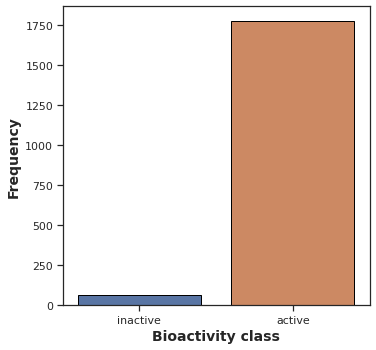

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

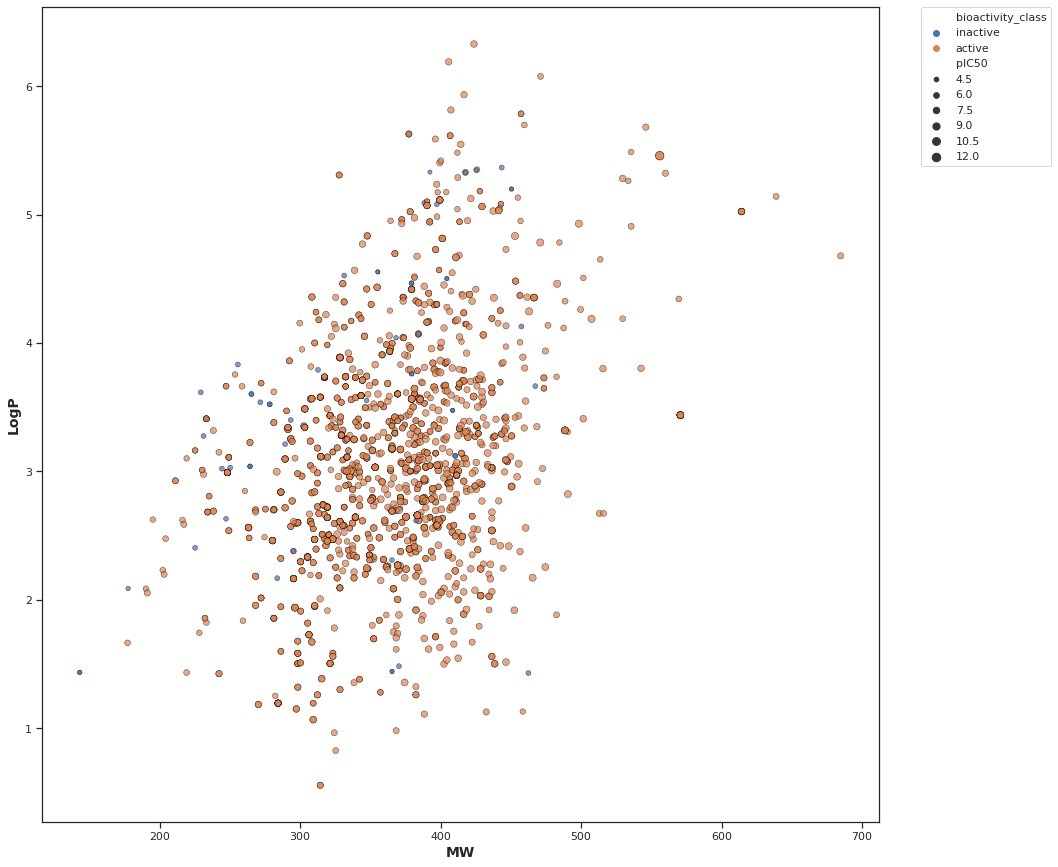

In [ ]:
plt.figure(figsize=(15, 15))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

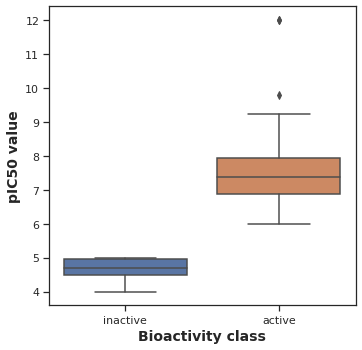

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,110236.0,5.821702e-41,0.05,Different distribution (reject H0)


#### **MW**

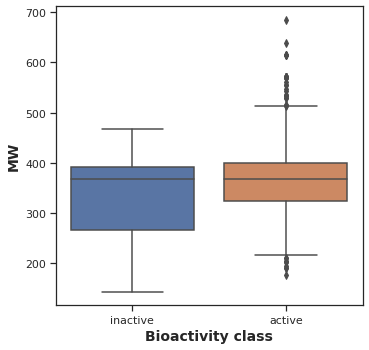

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,62980.5,0.055905,0.05,Same distribution (fail to reject H0)


#### **LogP**

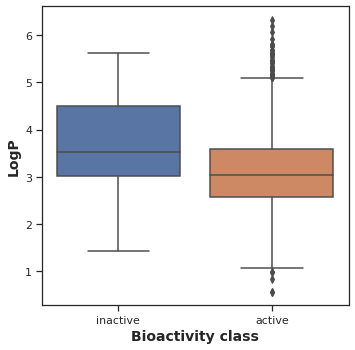

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,39651.0,0.000169,0.05,Different distribution (reject H0)


#### **NumHDonors**

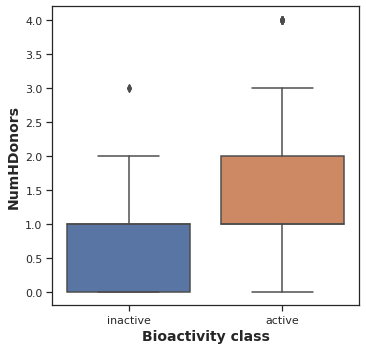

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,68312.5,0.000245,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

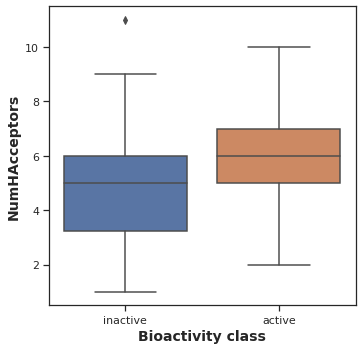

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,69362.5,0.000418,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: dardarin_bioactivity_preprocessed_data.csv (deflated 85%)
  adding: df_2class.csv (deflated 82%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
